# Hand writing classification using deep neural network

## 1. Introduction
In this investigation, I have explored whether the task of Hand Writing Recognition (HWR) can be achieved using deep neural networks (DNN). Firstly, I will discuss the dataset used throughout this experiment, and how I prepared the data needed for this task. I will then mention the Deep Neural Network (DNN) models I have developed for this task and will examine the various approaches to issues faced by each model design. Finally, I will compare each model's performance, and determine the optimal model design for the task of HWR.

## 2. Methodology
### 2.1 Defining the problem and assembling the dataset
Hand Writing Recognition (HWR) is a simple task for us as we can easily distinguish letters and numbers from handwriting. However, this is because we have a visual cortex and a computer does not(yet)! This means that computers can only visualise binary interpretations of data. Hence, computers can easily compare digital text and numbers since their binary values will always be the same. However everyone's handwriting is unique, so the binary interpretation of handwritten letters and numbers will never be the same.

### The dataset
I will be using "EMNIST" dataset by Chris Crawford[1]. This dataset is essentially an extended version of "MNIST" and is at a much larger scale, but unlike MNIST, this dataset also contains handwritten letters.

The dataset comes in several separate dataset CSVs. The CSV I will be using will be the balanced dataset which contains in total of 131,600 samples (split between 112,800 training & 18,800 testing) with 47 total classes, so essentially this will be a multiclass classification problem. 

It is also important to note that some of the classes have been merged. For example, the "i" class has been merged with its corresponding capital letter class of "I". The merge is necessary to reduce misclassification errors due to some lower case letters that may look similar to their associated uppercase letter. Hence, the total number of classes has been reduced to 47 from 62.

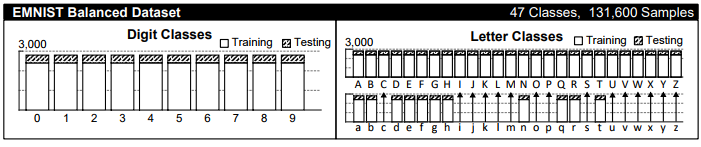

Each sample of the dataset represents a 28x28 image. The author of this dataset has already preprocessed the data into its numerical form, which is convenient. This means each sample is a 1D array length of 784 (product of 28 x 28). The sample only consists of 1 channel as it is expressed in grayscale. values of the array range from [0-255].

The input data is typically formatted like this:
- [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   1  20  50 112  46   8   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  19 151 220 244 208 126  34   4   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   7  90 218 252 254 253 234 191
  36   7   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   8  77 177 244 254 254 249 203  95  38  20   1   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2  34 126 208
 247 254 253 234 216 159  51   5   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   8  47 159 232 250 252 254 247 218  59
   9   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   3  21  39  95 207 245 252 246 220 159  47   3   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   7  46 115
 172 247 254 247 208  79   8   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   4  22 164 247 254 254 218  90   7
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0  67 227 254 254 253 202  32   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   2  24 207 253 254 254 250
 170  21   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   4  67 170 249 254 254 253 175  67   2   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   1  22  84 187 250 254 254 253
 219  36   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   3  47 159 232 252 254 254 253 219  91   1   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   4  36 159 246 254 254 254 254 244
 163  35   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
  33 115 177 246 254 254 254 254 244 127  33   1   0   0   0   0   0   0
   0   0   0   0   0   0   0   1  20  52 163 243 252 254 254 254 247 208
 126  10   0   0   0   0   0   0   0   0   0   0   0   0   0   2   5  36
 158 222 247 254 254 254 250 232 159  47   8   0   0   0   0   0   0   0
   0   0   0   0   0   3   4 110 213 234 253 254 254 254 251 230  63  21
   3   0   0   0   0   0   0   0   0   0   0   0   0   0  18 108 127 191
 252 254 254 254 253 232 171  83   5   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  36 211 249 252 254 255 254 234 202  95  22   3
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  30 158
 235 254 255 254 250 100  34   7   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   9  90 227 221 214 126   5   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   7  68  49  37  18   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]

#### 2.1.1 Hypothesis
- The data I will be using will be sufficient enough to learn the relationship between inputs and outputs.
- The output of handwritten numbers and letters can be predicted from the given input data.


## 2.2 Choosing a measure of success
A measure of success will be required as it will help me know how good the model is. Accuracy will be the measurement of success. Since the task is a multi-class classification, I will be using the "categorical_crossentropy" for my loss function, and this will be dependent on the measurement of success. I will be using loss and accuracy metrics to measure the success of the model. The accuracy will be expressed as a percentage, so if the accuracy is "0.80", it would mean the model has achieved 80% accuracy, ideally, we want the accuracy to be as high as possible. Whereas for the loss, we want the loss to be as low as possible, ideally, under 0, anything higher than that would indicate overfitting or underfitting.

## 2.3 Deciding on an evaluation protocol
One of the theories of the deep learning workflow is to initially begin with a small model, then start to build upon the model until the model begins to overfit. Overfitting is normal, it happens when the Model learns patterns that are specific to the data it has been trained with, however completely irrelevant to new data, and in turn, may mean the model will perform worse on the new data.

Identifying when the model overfits is a vital step towards mitigating overfitting and achieving the best optimal model for the task. Having an evaluation protocol will help us identify this. 

Maintaining hold-out validation will be my evaluation protocol (I can use K-fold validation, but since I have a sufficient amount of data, this will not be necessary). This protocol involves splitting my data into three partitions: Train, Validation & Test. The validation set will be used to evaluate the model during training. If the model performs well on the validation set, this will indicate the model has been optimised, else it would mean overfitting has occurred.

## 2.3 Preparing your data
### 2.3.1 Import necassary libraries
I will need to import the necessary libraries before I can proceed with preparing the data.







In [1]:
#imports
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

I have made a couple of helper tools to make it more convenient for loading data, plotting and displaying images.

In [129]:
#Load training & testing data
def load_data():
  dir = "../input/emnist/" #For my PC
#   dir = "./drive/MyDrive/input/emnist/" #for google drive

  #Retrieves the CSV data as np array
  training_data = np.array(pd.read_csv(dir+"emnist-balanced-train.csv"))
  testing_data = np.array(pd.read_csv(dir+"emnist-balanced-test.csv"))
                          
  #Shuffles the np array                        
  np.random.shuffle(training_data)
  np.random.shuffle(testing_data)
                          
  #Create training X & Y data                        
  X_train = training_data[:,1:]
  Y_train = training_data[:,0]
  
  #Create testing X & Y data  
  X_test = testing_data[:,1:]
  Y_test = testing_data[:,0]

  return (X_train, Y_train), (X_test, Y_test)

#Plots the model's validation and loss history
def plot_history_results(history_dict):
  plt.clf()
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  epochs = range(1,len(loss)+1)

  fig, axs = plt.subplots(1,2,figsize=(10,5))
  axs[0].set_title("Training and validation acc")
  axs[0].plot(epochs, acc, "bo",label="training acc")
  axs[0].plot(epochs, val_acc, "b",label="Validation acc")
  axs[0].set_xlabel("Epochs")
  axs[0].set_ylabel("Loss")
  axs[0].legend(loc='upper left')

  axs[1].set_title("Training and validation loss")
  axs[1].plot(epochs, loss, "bo",label="training loss")
  axs[1].plot(epochs, val_loss, "b",label="Validation loss")
  axs[1].set_xlabel("Epochs")
  axs[1].set_ylabel("Accuracy")
  axs[1].legend(loc='upper left')

  max_val_acc = max(val_acc)
  min_val_acc = min(val_acc)
  max_val_loss = max(val_loss)
  min_val_loss = min(val_loss)
  print("\nMax validation acc: "+str(max_val_acc)+"\nMin validation acc: "+str(min_val_acc)+"\nMax validation loss: "+str(max_val_loss)+"\nMin validation loss: "+str(min_val_loss))
  plt.show()

def compare_models(model_history1,model_history2,model_1,model_2):
  plt.clf()
  model1_loss = model_history1['val_loss']
  model2_loss = model_history2['val_loss']
  model1_acc = model_history1['val_accuracy']
  model2_acc = model_history2['val_accuracy']

  epochs = range(1,len(model1_loss)+1)

  fig, axs = plt.subplots(1,2,figsize=(10,5))
  axs[0].set_title(model_1+" and "+model_2+" acc")
  axs[0].plot(epochs, model1_acc, "bo",label=model_1+" acc")
  axs[0].plot(epochs, model2_acc, "b",label=model_2+" acc")
  axs[0].set_xlabel("Epochs")
  axs[0].set_ylabel("Loss")
  axs[0].legend()

  axs[1].set_title(model_1+" and "+model_2+" loss")
  axs[1].plot(epochs, model1_loss, "bo",label=model_1+" loss")
  axs[1].plot(epochs, model2_loss, "b",label=model_2+" loss")
  axs[1].set_xlabel("Epochs")
  axs[1].set_ylabel("Accuracy")
  axs[1].legend()
  plt.show()
    

#Displays the image of the given sample
def display_img(img_sample):
  img_sample = img_sample.reshape(28,28)
  plt.imshow(img_sample,cmap="gray")

### 2.3.2 Load the data
Right now the data is stored in a CSV file and will be required to be loaded onto memory so that it can be used. The "read_csv" method from pandas can achieve this task.

There are two CSVs, one for training and the other for testing. I created a function that does the job of creating the testing and training sets.

In [40]:
#Load the data
(X_train, Y_train), (X_test, Y_test) = load_data()

Testing to see if the data has been loaded properly. 

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   3   8  32  37  20   1   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   3  21  38  84 127 203 215 158  33
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   4   5  21
  38  84 170 216 233 246 254 254 243 113   4   0   0   0   0   0   0   0
   0   0   0   0   8  22  82 125 129 172 216 233 251 254 254 254 254 255
 250 127   4   0   0   0   0   0   0   1  20  37  37  51 127 171 232 249
 250 252 254 254 254 247 222 218 236 254 250 127   4   0   0   0   0   0
   0  20 153 215 217 222 246 251 254 254 254 254 252 245 220 159  52  43
 144 250 250 129   5   0   0   0   0   0   0  37 215 254 252 250 250 249
 233 218 236 252 204 121  50  20   1   2  82 233 25

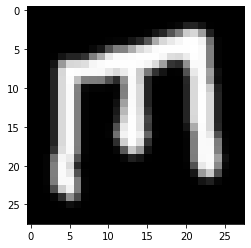

In [46]:
print(X_train[20])
display_img(X_train[20])

### 2.3.3 Preprocessing the data
The data will need to be preprocessed. Preprocessing is a task that involves vectorizing, normalization, handling missing values and feature extraction from data. This will help the data be more amendable so that DNN can use it. In this case, the data is casted as float32 and normalized from [0,255] to the range of [0,1], as it is preferred to use smaller values for Neural Networks.

In [47]:
#Pre process the data
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

The corresponding labels from the "Y" set are one-hot encoded. One hot encoding will turn labels into an array of bits where only a single bit is "1" and all the others are "0". The array is of length equal to the number of classes, where each indice represents a specific class.

In [48]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

### 2.3.4 Creating validation and training sets
This will be further split into validation and training sets. The validation set will be used to validate the model, it will also help determine if the model is "overfit" or "underfit".

In [49]:
#Create validation & partial training sets
X_val = X_train[:40000]
partial_X_train = X_train[40000:]
Y_val = Y_train[:40000]
partial_Y_train = Y_train[40000:]

## 2.4 Developing a model that does better than a baseline
To establish that my model has statistical power and is valid for further development, I will need to confirm that it performs better than a dumb baseline. As my dataset contains 47 classes, the chance of randomly selecting the correct class is 1/47. Therefore, to have statistical power, my model will need to achieve accuracy greater than 1/47(0.0212765957). If my model cannot beat the baseline, this would suggest the hypothesis I have made earlier has been false, and that statistical power cannot be achieved for this specific task.

For this model, I have used a sequential network of dense layers. The first layer will be using the "Relu" activation function and will have 64 hidden units. Since the task is a multiclass categorisation problem, the last layer of the model will have the "softmax" activation function, it has 47 units which is equal to the number of classes. The optimizer will be RMSPROP and its learning rate value will be set to the default value (the learning rate can be adjusted).

The model is set to be trained for 30 epochs with a mini-batch size of 128. The model will be trained using the training sets and will be evaluated using the validation sets created earlier.


### Model 1: Simple 1 layer network

Epoch 1/30
569/569 [==============================] - 2s 2ms/step - loss: 1.6169 - accuracy: 0.5688 - val_loss: 1.1855 - val_accuracy: 0.6641
Epoch 2/30
569/569 [==============================] - 1s 2ms/step - loss: 1.0908 - accuracy: 0.6925 - val_loss: 1.0309 - val_accuracy: 0.7042
Epoch 3/30
569/569 [==============================] - 1s 2ms/step - loss: 0.9478 - accuracy: 0.7288 - val_loss: 0.9321 - val_accuracy: 0.7292
Epoch 4/30
569/569 [==============================] - 1s 2ms/step - loss: 0.8562 - accuracy: 0.7520 - val_loss: 0.8562 - val_accuracy: 0.7513
Epoch 5/30
569/569 [==============================] - 1s 2ms/step - loss: 0.7913 - accuracy: 0.7666 - val_loss: 0.8240 - val_accuracy: 0.7558
Epoch 6/30
569/569 [==============================] - 1s 2ms/step - loss: 0.7459 - accuracy: 0.7764 - val_loss: 0.7867 - val_accuracy: 0.7679
Epoch 7/30
569/569 [==============================] - 1s 2ms/step - loss: 0.7103 - accuracy: 0.7854 - val_loss: 0.7582 - val_accuracy: 0.7742
Epoch 

<Figure size 432x288 with 0 Axes>

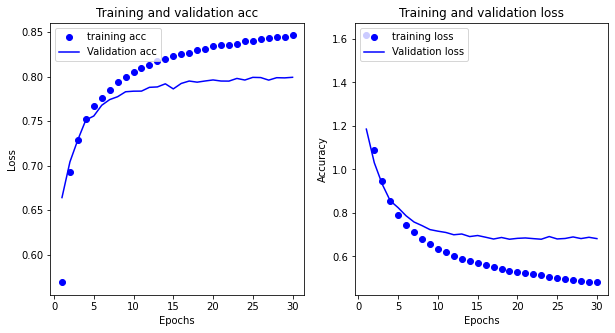

In [50]:
#Build
model = models.Sequential()
model = models.Sequential()
model.add(layers.Dense(64,activation="relu", input_shape=(784,)))
model.add(layers.Dense(47,activation="softmax"))

model.compile(optimizer=optimizers.RMSprop(lr=0.001, momentum=0.1),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


#Train the model
history = model.fit(partial_X_train, partial_Y_train , epochs=30,batch_size=128,validation_data=(X_val, Y_val))
#Plot the results
plot_history_results(history.history)

My first iteration currently achieves an accuracy of 0.79. As expected, my model has achieved statistical power, far greater than the baseline model.

## 2.5 Scaling up: developing a model that overfits

### Model 2: 2 layers and units to 512

The first model has successfully achieved statistical power, however, it still lacked the potential optimal weights, biases and number of layers for the problem. The next step is to develop a much larger model until overfitting can occur. This can be achieved simply by adding more layers, increasing units etc. The purpose of having this model enables us to draw a line to show where and when the model begins to overfit. We can use this info to regularise our model until we find the optimal model for the problem.

For this model, I have added two layers, each with 512 units. Increasing the units would essentially add more memory capacity to the model. Having more memory capacity would mean the model will remember patterns that are specific to the training data, however completely irrelevant to new unseen data. This in theory would cause the model to overfit. The number of epochs and batch sizes has remained unchanged.

Epoch 1/30
569/569 [==============================] - 6s 10ms/step - loss: 0.9981 - accuracy: 0.7001 - val_loss: 0.6622 - val_accuracy: 0.7822
Epoch 2/30
569/569 [==============================] - 5s 9ms/step - loss: 0.5460 - accuracy: 0.8172 - val_loss: 0.5486 - val_accuracy: 0.8148
Epoch 3/30
569/569 [==============================] - 5s 9ms/step - loss: 0.4397 - accuracy: 0.8485 - val_loss: 0.5057 - val_accuracy: 0.8311
Epoch 4/30
569/569 [==============================] - 5s 9ms/step - loss: 0.3770 - accuracy: 0.8657 - val_loss: 0.5135 - val_accuracy: 0.8342
Epoch 5/30
569/569 [==============================] - 5s 9ms/step - loss: 0.3296 - accuracy: 0.8794 - val_loss: 0.4952 - val_accuracy: 0.8421
Epoch 6/30
569/569 [==============================] - 5s 9ms/step - loss: 0.2940 - accuracy: 0.8898 - val_loss: 0.5136 - val_accuracy: 0.8372
Epoch 7/30
569/569 [==============================] - 5s 10ms/step - loss: 0.2640 - accuracy: 0.8984 - val_loss: 0.5479 - val_accuracy: 0.8323
Epoc

<Figure size 432x288 with 0 Axes>

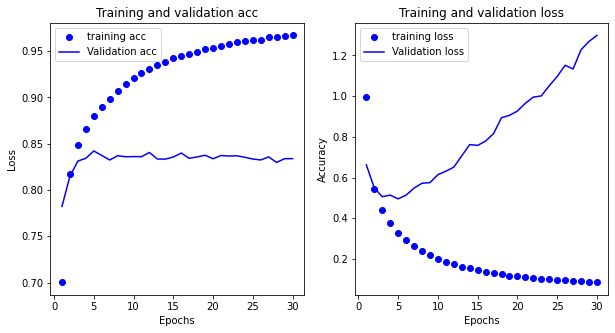

In [70]:
#Build
model = models.Sequential()
model.add(layers.Dense(512,activation="relu", input_shape=(784,)))
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(47,activation="softmax"))


model.compile(optimizer=optimizers.RMSprop(lr=0.001, momentum=0.1),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Train the model
history2 = model.fit(partial_X_train, partial_Y_train , epochs=30,batch_size=128,validation_data=(X_val, Y_val))
#Plot the results
plot_history_results(history2.history)

The model achieved the best accuracy of 0.842, and the best loss of 0.495. The plotting of this model shows the model has overfitted around the 4th epoch, this was expected. The accuracy stalls at around 82%, dropping ever so slightly, whereas the loss has deteriorated to 1.272, and it seems to be increasing linearly.

## 2.6 Regularizing your model and tuning your hyperparameters 

### 2.6.1 Model 3: reducing hidden units to 50



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/30
569/569 [==============================] - 3s 5ms/step - loss: 1.6746 - accuracy: 0.5585 - val_loss: 1.2815 - val_accuracy: 0.6428
Epoch 2/30
569/569 [==============================] - 2s 4ms/step - loss: 1.1663 - accuracy: 0.6728 - val_loss: 1.1194 - val_accuracy: 0.6845
Epoch 3/30
569/569 [==============================] - 2s 4ms/step - loss: 1.0348 - accuracy: 0.7062 - val_loss: 1.0162 - val_accuracy: 0.7106
Epoch 4/30
569/569 [==============================] - 2s 4ms/step - loss: 0.9388 - accuracy: 0.7308 - val_loss: 0.9615 - val_accuracy: 0.7237
Epoch 5/30
569/569 [==============================] - 2s 4ms/step - loss: 0.8690 - accuracy: 0.7469 - val_loss: 0.8873 - val_accuracy: 0.7436
Epoch 6/30
569/569 [==============================] - 2s 4ms/step - loss: 0.8193 - accuracy: 0.7598 - val_loss: 0.8527 - val_accuracy: 0.7487
Epoch 7/30
569/569 [==============================] - 3s 4ms/step - loss: 0.7800 - accuracy: 0.7686 - val_loss: 0.8258 - val_accuracy: 0.7573
Epoch 

<Figure size 432x288 with 0 Axes>

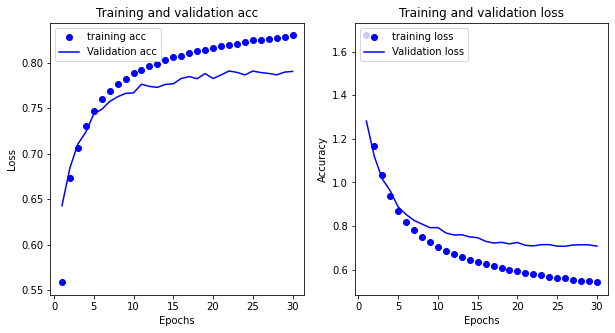

In [29]:
#Build
model = models.Sequential()
model.add(layers.Dense(50,activation="relu", input_shape=(784,)))
model.add(layers.Dense(47,activation="softmax"))


model.compile(optimizer=optimizers.RMSprop(lr=0.001, momentum=0.1),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


#Train the model
history3 = model.fit(partial_X_train, partial_Y_train , epochs=30,batch_size=128,validation_data=(X_val, Y_val))
#Plot the results
plot_history_results(history3.history)

Results from Model 3 have revealed the best accuracy of 0.79 and the best loss of 0.706. The plotting shown above has shown us that decreasing the unit to 50 has significantly mitigated overfitting. Both, the loss and accuracy are stable, albeit overfits off at around the 5th epoch. From this result, it was decided to consider adding the feature of reduced units for the final model.

### 2.6.2 Model 4: Adding extra layer



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/30
569/569 [==============================] - 3s 5ms/step - loss: 1.5414 - accuracy: 0.5773 - val_loss: 1.0883 - val_accuracy: 0.6835
Epoch 2/30
569/569 [==============================] - 2s 4ms/step - loss: 0.9639 - accuracy: 0.7154 - val_loss: 0.8890 - val_accuracy: 0.7361
Epoch 3/30
569/569 [==============================] - 2s 4ms/step - loss: 0.8182 - accuracy: 0.7522 - val_loss: 0.8143 - val_accuracy: 0.7538
Epoch 4/30
569/569 [==============================] - 3s 5ms/step - loss: 0.7348 - accuracy: 0.7730 - val_loss: 0.7879 - val_accuracy: 0.7607
Epoch 5/30
569/569 [==============================] - 3s 5ms/step - loss: 0.6800 - accuracy: 0.7868 - val_loss: 0.7195 - val_accuracy: 0.7766
Epoch 6/30
569/569 [==============================] - 2s 4ms/step - loss: 0.6373 - accuracy: 0.7990 - val_loss: 0.7060 - val_accuracy: 0.7809
Epoch 7/30
569/569 [==============================] - 2s 4ms/step - loss: 0.6066 - accuracy: 0.8075 - val_loss: 0.6816 - val_accuracy: 0.7878
Epoch 

<Figure size 432x288 with 0 Axes>

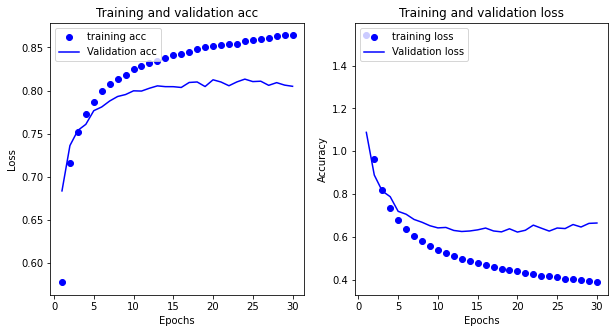

In [54]:
#Build
model = models.Sequential()
model.add(layers.Dense(64,activation="relu", input_shape=(784,)))
model.add(layers.Dense(64,activation="relu", input_shape=(784,)))
model.add(layers.Dense(47,activation="softmax"))


model.compile(optimizer=optimizers.RMSprop(lr=0.001, momentum=0.1),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


#Train the model
history4 = model.fit(partial_X_train, partial_Y_train , epochs=30,batch_size=128,validation_data=(X_val, Y_val))
#Plot the results
plot_history_results(history4.history)

Model 5 achieved the best accuracy of 0.813 and the best loss of 0.622. From the plot above, it was shown that adding a second layer has increased the accuracy and further decreased the loss, which is significant. However, like the previous model, symptoms of overfitting still show at around the 5th epoch. The second layer added additional weights and biases, which in turn helped to speed up the jump in accuracy compared to the previous model. So it was decided for the final model to consider having 2 layers.

### 2.6.3 Model 5: 2 layers, Increasing first layer hyperparameter units to 128



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/30
569/569 [==============================] - 5s 8ms/step - loss: 1.4355 - accuracy: 0.6023 - val_loss: 0.9990 - val_accuracy: 0.7024
Epoch 2/30
569/569 [==============================] - 3s 5ms/step - loss: 0.8430 - accuracy: 0.7447 - val_loss: 0.7728 - val_accuracy: 0.7587
Epoch 3/30
569/569 [==============================] - 3s 5ms/step - loss: 0.6890 - accuracy: 0.7841 - val_loss: 0.6987 - val_accuracy: 0.7772
Epoch 4/30
569/569 [==============================] - 3s 5ms/step - loss: 0.6105 - accuracy: 0.8042 - val_loss: 0.6474 - val_accuracy: 0.7951
Epoch 5/30
569/569 [==============================] - 3s 5ms/step - loss: 0.5568 - accuracy: 0.8168 - val_loss: 0.6106 - val_accuracy: 0.8056
Epoch 6/30
569/569 [==============================] - 3s 5ms/step - loss: 0.5198 - accuracy: 0.8289 - val_loss: 0.6049 - val_accuracy: 0.8094
Epoch 7/30
569/569 [==============================] - 3s 5ms/step - loss: 0.4906 - accuracy: 0.8350 - val_loss: 0.6205 - val_accuracy: 0.8052
Epoch 

<Figure size 432x288 with 0 Axes>

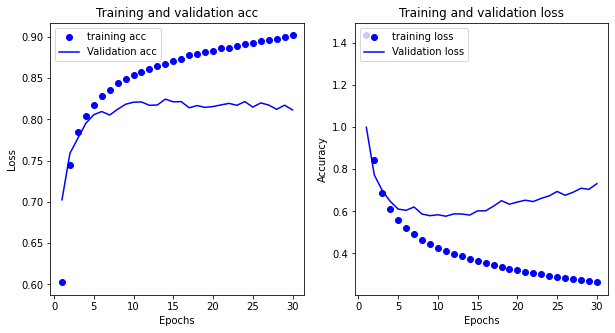

In [53]:
#Build
model = models.Sequential()
model.add(layers.Dense(128,activation="relu", input_shape=(784,)))
model.add(layers.Dense(64,activation="relu", input_shape=(784,)))
model.add(layers.Dense(47,activation="softmax"))


model.compile(optimizer=optimizers.RMSprop(lr=0.001, momentum=0.1),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Train the model
history5 = model.fit(partial_X_train, partial_Y_train , epochs=30,batch_size=128,validation_data=(X_val, Y_val))
#Plot the results
plot_history_results(history5.history)

The output of model 5 has shown the best accuracy of 0.824 and the best loss of 0.57. From the plot above, there have been improvements within the loss and accuracy. Increasing the first-layer unit from 64 to 128 has shown that the model has learnt the general patterns from the inputs. The second layer acts like a funnel, where the irrelevant patterns are funnelled out leaving the important patterns to be used for the problem. Although the model still shows evidence of overfitting at around the 5th epoch, the effects of deterioration do not seem to be as bad compared to model 2. It was decided to consider increasing the first layer to 128 for the final model.

### 2.6.4 Model 6: increasing the learning rate to 0.0025


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/30
569/569 [==============================] - 4s 6ms/step - loss: 1.3353 - accuracy: 0.6248 - val_loss: 1.0265 - val_accuracy: 0.6947
Epoch 2/30
569/569 [==============================] - 2s 4ms/step - loss: 0.8566 - accuracy: 0.7444 - val_loss: 0.8564 - val_accuracy: 0.7429
Epoch 3/30
569/569 [==============================] - 3s 4ms/step - loss: 0.7458 - accuracy: 0.7713 - val_loss: 0.7598 - val_accuracy: 0.7653
Epoch 4/30
569/569 [==============================] - 3s 5ms/step - loss: 0.6883 - accuracy: 0.7871 - val_loss: 0.7386 - val_accuracy: 0.7728
Epoch 5/30
569/569 [==============================] - 3s 4ms/step - loss: 0.6496 - accuracy: 0.7960 - val_loss: 0.7427 - val_accuracy: 0.7758
Epoch 6/30
569/569 [==============================] - 2s 4ms/step - loss: 0.6222 - accuracy: 0.8038 - val_loss: 0.7189 - val_accuracy: 0.7817
Epoch 7/30
569/569 [==============================] - 2s 4ms/step - loss: 0.6015 - accuracy: 0.8091 - val_loss: 0.6968 - val_accuracy: 0.7885
Epoch 

<Figure size 432x288 with 0 Axes>

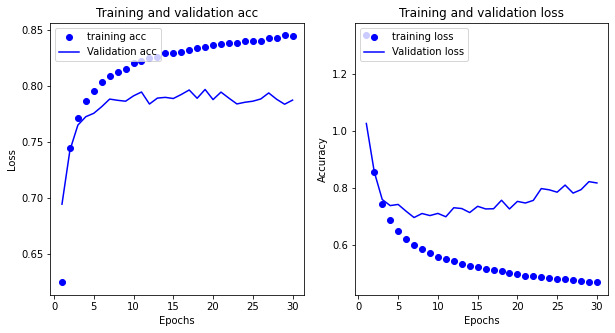

In [52]:
#Build
model = models.Sequential()
model.add(layers.Dense(64,activation="relu", input_shape=(784,)))
model.add(layers.Dense(47,activation="softmax"))


model.compile(optimizer=optimizers.RMSprop(lr=0.0025, momentum=0.1),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])



#Train the model
history6 = model.fit(partial_X_train, partial_Y_train , epochs=30,batch_size=128,validation_data=(X_val, Y_val))
#Plot the results
plot_history_results(history6.history)

The given output from model 6 has shown us the best accuracy of 0.797 and the best loss of 0.696. From the plot above we see the results have slightly deteriorated and has given us a slightly unstable accuracy and loss. Increasing the learning rate from 0.001 to 0.0025 has revealed that the model has overshot from the lowest minimum into a slightly shallow one. The model still reveals evidence of overfitting at around the 5th epoch. Based on the results, it was decided not to consider increasing the learning rate to 0.0025 for the final model.


### 2.6.5 Model 7: decreasing the learning rate to 0.0005



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/30
569/569 [==============================] - 3s 5ms/step - loss: 2.0467 - accuracy: 0.4853 - val_loss: 1.4286 - val_accuracy: 0.6058
Epoch 2/30
569/569 [==============================] - 2s 4ms/step - loss: 1.2873 - accuracy: 0.6453 - val_loss: 1.2299 - val_accuracy: 0.6603
Epoch 3/30
569/569 [==============================] - 2s 4ms/step - loss: 1.1531 - accuracy: 0.6803 - val_loss: 1.1403 - val_accuracy: 0.6831
Epoch 4/30
569/569 [==============================] - 2s 4ms/step - loss: 1.0726 - accuracy: 0.7015 - val_loss: 1.0756 - val_accuracy: 0.6985
Epoch 5/30
569/569 [==============================] - 2s 4ms/step - loss: 1.0099 - accuracy: 0.7180 - val_loss: 1.0156 - val_accuracy: 0.7143
Epoch 6/30
569/569 [==============================] - 2s 4ms/step - loss: 0.9586 - accuracy: 0.7300 - val_loss: 0.9766 - val_accuracy: 0.7224
Epoch 7/30
569/569 [==============================] - 2s 4ms/step - loss: 0.9144 - accuracy: 0.7406 - val_loss: 0.9447 - val_accuracy: 0.7300
Epoch 

<Figure size 432x288 with 0 Axes>

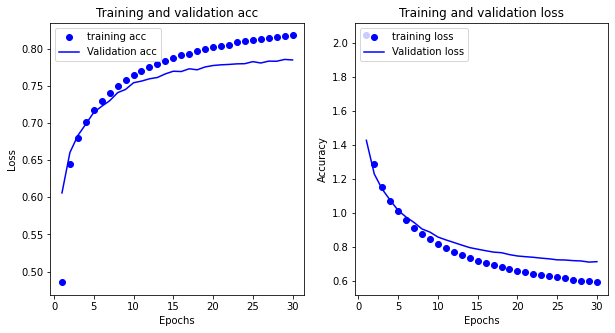

In [51]:
#Build
model = models.Sequential()
model.add(layers.Dense(64,activation="relu", input_shape=(784,)))
model.add(layers.Dense(47,activation="softmax"))


model.compile(optimizer=optimizers.RMSprop(lr=0.0004, momentum=0.1),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


#Train the model
history7 = model.fit(partial_X_train, partial_Y_train , epochs=30,batch_size=128,validation_data=(X_val, Y_val))
#Plot the results
plot_history_results(history7.history)

The output of model 7 has given the best accuracy of 0.78 and the best loss of 0.6. From the plot above, we see both, the accuracy and loss have a much stable trajectory, albeit at a much slower pace. Decreasing the learning rate from 0.001 to 0.0005 has shown us the model is taking small steps towards the lowest minimum, this would take more time compared to the previous models. Slight overfitting does occur around the 9th epoch. It was decided that decreasing the learning rate to 0.0005 may be considered for the final model.

### 2.6.6 Model 8: Adding drop out (0.5)



Epoch 1/30
569/569 [==============================] - 2s 3ms/step - loss: 2.3292 - accuracy: 0.3648 - val_loss: 1.3584 - val_accuracy: 0.6372
Epoch 2/30
569/569 [==============================] - 1s 2ms/step - loss: 1.6708 - accuracy: 0.5183 - val_loss: 1.1581 - val_accuracy: 0.6795
Epoch 3/30
569/569 [==============================] - 1s 2ms/step - loss: 1.5229 - accuracy: 0.5577 - val_loss: 1.0585 - val_accuracy: 0.6961
Epoch 4/30
569/569 [==============================] - 1s 2ms/step - loss: 1.4636 - accuracy: 0.5748 - val_loss: 1.0107 - val_accuracy: 0.7096
Epoch 5/30
569/569 [==============================] - 1s 2ms/step - loss: 1.4172 - accuracy: 0.5872 - val_loss: 0.9736 - val_accuracy: 0.7197
Epoch 6/30
569/569 [==============================] - 1s 2ms/step - loss: 1.3886 - accuracy: 0.5940 - val_loss: 0.9448 - val_accuracy: 0.7268
Epoch 7/30
569/569 [==============================] - 1s 2ms/step - loss: 1.3673 - accuracy: 0.5999 - val_loss: 0.9281 - val_accuracy: 0.7321
Epoch 

<Figure size 432x288 with 0 Axes>

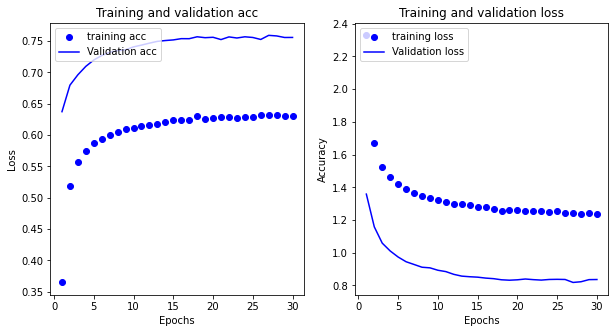

In [10]:
#Build
model = models.Sequential()
model.add(layers.Dense(64,activation="relu", input_shape=(784,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(47,activation="softmax"))


model.compile(optimizer=optimizers.RMSprop(lr=0.001, momentum=0.1),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


#Train the model
history8 = model.fit(partial_X_train, partial_Y_train , epochs=30,batch_size=128,validation_data=(X_val, Y_val))
#Plot the results
plot_history_results(history8.history)

The output above for model 8 shows the best validation accuracy of 0.759 and the best loss of 0.818. The plot above has shown us that the model is generalised fine as the validation accuracy and loss are greater than the training accuracy and loss. However, this also shows us that the progress of accuracy and loss has stalled, and is increasing very slightly. Compared to the previous models, this model shows no evidence of overfitting, which is significant. having a dropout layer is a regularization technique, it works by randomly dropping some outputs from each layer, this drastically reduces the chance of the model overfitting to the training set. It was decided to consider adding a dropout layer to the final model.

### 2.6.7 Model 9: l1 reg



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/30
569/569 [==============================] - 3s 5ms/step - loss: 2.5106 - accuracy: 0.5254 - val_loss: 2.0103 - val_accuracy: 0.6073
Epoch 2/30
569/569 [==============================] - 2s 4ms/step - loss: 1.8767 - accuracy: 0.6250 - val_loss: 1.8281 - val_accuracy: 0.6230
Epoch 3/30
569/569 [==============================] - 2s 4ms/step - loss: 1.7274 - accuracy: 0.6472 - val_loss: 1.7038 - val_accuracy: 0.6448
Epoch 4/30
569/569 [==============================] - 2s 4ms/step - loss: 1.6329 - accuracy: 0.6600 - val_loss: 1.6380 - val_accuracy: 0.6543
Epoch 5/30
569/569 [==============================] - 2s 4ms/step - loss: 1.5611 - accuracy: 0.6706 - val_loss: 1.5484 - val_accuracy: 0.6727
Epoch 6/30
569/569 [==============================] - 2s 4ms/step - loss: 1.5045 - accuracy: 0.6798 - val_loss: 1.5049 - val_accuracy: 0.6815
Epoch 7/30
569/569 [==============================] - 3s 4ms/step - loss: 1.4593 - accuracy: 0.6898 - val_loss: 1.4643 - val_accuracy: 0.6895
Epoch 

<Figure size 432x288 with 0 Axes>

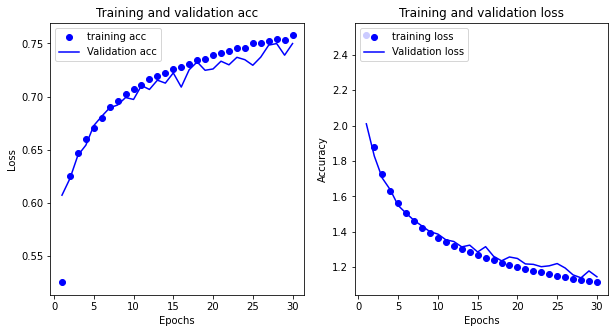

In [55]:
#Build
model = models.Sequential()
model.add(layers.Dense(64,kernel_regularizer=regularizers.l1(0.001),activation="relu", input_shape=(784,)))
model.add(layers.Dense(47,activation="softmax"))


model.compile(optimizer=optimizers.RMSprop(lr=0.001, momentum=0.1),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


#Train the model
history9 = model.fit(partial_X_train, partial_Y_train , epochs=30,batch_size=128,validation_data=(X_val, Y_val))
#Plot the results
plot_history_results(history9.history)

The output of model 9 has shown the best validation accuracy of 0.749 and best loss of 1.13. The plot above shows that the model has achieved generalization from the input data. However, accuracy and loss do seem to be progressing very slowly. There seems to be very little evidence of overfitting, however, the outputs do look slightly unstable after the 13th epoch. The use of L1 regularization works by a cost added is proportional to the absolute value of the weight coefficients[2], this, in turn, helps reduce the effects of overfitting significantly. It was decided that L1 regularization may be considered for the final model.

### 2.6.8 Model 10: l2 reg



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/30
569/569 [==============================] - 3s 4ms/step - loss: 1.7347 - accuracy: 0.5714 - val_loss: 1.3778 - val_accuracy: 0.6484
Epoch 2/30
569/569 [==============================] - 3s 4ms/step - loss: 1.2574 - accuracy: 0.6832 - val_loss: 1.2083 - val_accuracy: 0.6934
Epoch 3/30
569/569 [==============================] - 2s 4ms/step - loss: 1.1214 - accuracy: 0.7163 - val_loss: 1.1036 - val_accuracy: 0.7233
Epoch 4/30
569/569 [==============================] - 2s 4ms/step - loss: 1.0322 - accuracy: 0.7371 - val_loss: 1.0378 - val_accuracy: 0.7348
Epoch 5/30
569/569 [==============================] - 2s 4ms/step - loss: 0.9679 - accuracy: 0.7540 - val_loss: 0.9820 - val_accuracy: 0.7485
Epoch 6/30
569/569 [==============================] - 2s 4ms/step - loss: 0.9209 - accuracy: 0.7632 - val_loss: 0.9478 - val_accuracy: 0.7548
Epoch 7/30
569/569 [==============================] - 2s 4ms/step - loss: 0.8833 - accuracy: 0.7721 - val_loss: 0.9165 - val_accuracy: 0.7618
Epoch 

<Figure size 432x288 with 0 Axes>

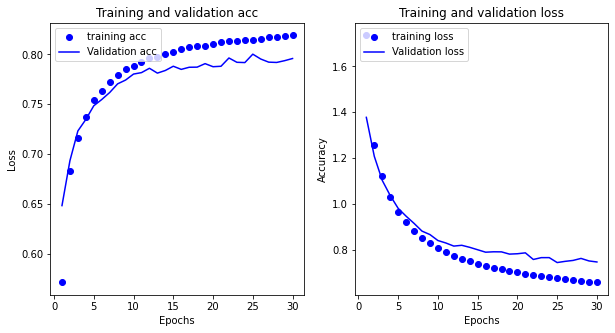

In [56]:
#Build
model = models.Sequential()
model.add(layers.Dense(64,kernel_regularizer=regularizers.l2(0.001),activation="relu", input_shape=(784,)))
model.add(layers.Dense(47,activation="softmax"))


model.compile(optimizer=optimizers.RMSprop(lr=0.001, momentum=0.1),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Train the model
history10 = model.fit(partial_X_train, partial_Y_train , epochs=30,batch_size=128,validation_data=(X_val, Y_val))
#Plot the results
plot_history_results(history10.history)

Model 10 above shows the output with the best accuracy of 0.8 and the best loss of 0.746. The plot above has shown us improvements within the accuracy and loss compared to the previous model. The use of L2 regularization works by having a cost that is added is proportional to the square of the value of the weight coefficients (the L2 norm of the weights)[2]. This in effect has shown much better generalisation from the inputs, albeit the model does show slight overfitting at around the 10th epoch. It was decided to consider having L2 regularization within the final model.

### 2.6.9 Model 11: l2 + dropout layer(0.01) 

Epoch 1/30
569/569 [==============================] - 3s 5ms/step - loss: 1.7523 - accuracy: 0.5656 - val_loss: 1.3509 - val_accuracy: 0.6542
Epoch 2/30
569/569 [==============================] - 2s 4ms/step - loss: 1.2587 - accuracy: 0.6808 - val_loss: 1.1844 - val_accuracy: 0.6988
Epoch 3/30
569/569 [==============================] - 2s 4ms/step - loss: 1.1296 - accuracy: 0.7146 - val_loss: 1.1002 - val_accuracy: 0.7207
Epoch 4/30
569/569 [==============================] - 2s 4ms/step - loss: 1.0410 - accuracy: 0.7355 - val_loss: 1.0210 - val_accuracy: 0.7396
Epoch 5/30
569/569 [==============================] - 3s 4ms/step - loss: 0.9784 - accuracy: 0.7498 - val_loss: 0.9932 - val_accuracy: 0.7358
Epoch 6/30
569/569 [==============================] - 3s 4ms/step - loss: 0.9315 - accuracy: 0.7612 - val_loss: 0.9339 - val_accuracy: 0.7588
Epoch 7/30
569/569 [==============================] - 2s 4ms/step - loss: 0.8933 - accuracy: 0.7693 - val_loss: 0.9137 - val_accuracy: 0.7572
Epoch 

<Figure size 432x288 with 0 Axes>

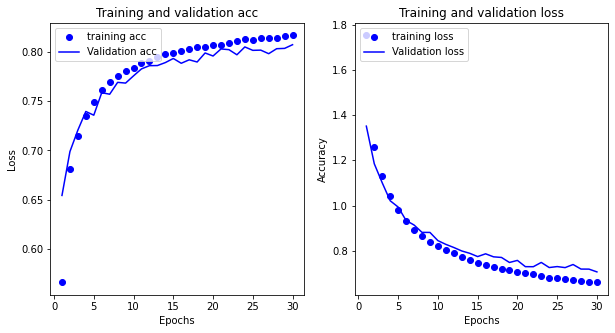

In [57]:
#Build
model = models.Sequential()
model.add(layers.Dense(64,kernel_regularizer=regularizers.l2(0.001),activation="relu", input_shape=(784,)))
model.add(layers.Dropout(0.01))
model.add(layers.Dense(47,activation="softmax"))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001, momentum=0.1),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Train the model
history11 = model.fit(partial_X_train, partial_Y_train , epochs=30,batch_size=128,validation_data=(X_val, Y_val))
#Plot the results
plot_history_results(history11.history)

The output of model 11 above showed the best accuracy of 0.807 and the best loss of 0.706. The plotted figure above has shown us that the combined use of L2 regularisation and Dropout layer has significantly reduced overfitting, achieving a much better generalisation. It was decided to consider having this feature within the final model.

### 2.6.10 Model 12: adding an additional layer  

Epoch 1/30
569/569 [==============================] - 4s 5ms/step - loss: 1.5759 - accuracy: 0.5664 - val_loss: 1.0624 - val_accuracy: 0.6837
Epoch 2/30
569/569 [==============================] - 2s 4ms/step - loss: 0.9357 - accuracy: 0.7199 - val_loss: 0.8522 - val_accuracy: 0.7418
Epoch 3/30
569/569 [==============================] - 2s 4ms/step - loss: 0.7909 - accuracy: 0.7550 - val_loss: 0.7806 - val_accuracy: 0.7575
Epoch 4/30
569/569 [==============================] - 3s 5ms/step - loss: 0.7091 - accuracy: 0.7776 - val_loss: 0.7518 - val_accuracy: 0.7666
Epoch 5/30
569/569 [==============================] - 3s 5ms/step - loss: 0.6562 - accuracy: 0.7904 - val_loss: 0.6893 - val_accuracy: 0.7840
Epoch 6/30
569/569 [==============================] - 2s 4ms/step - loss: 0.6130 - accuracy: 0.8004 - val_loss: 0.6867 - val_accuracy: 0.7815
Epoch 7/30
569/569 [==============================] - 2s 4ms/step - loss: 0.5830 - accuracy: 0.8099 - val_loss: 0.6639 - val_accuracy: 0.7904
Epoch 

<Figure size 432x288 with 0 Axes>

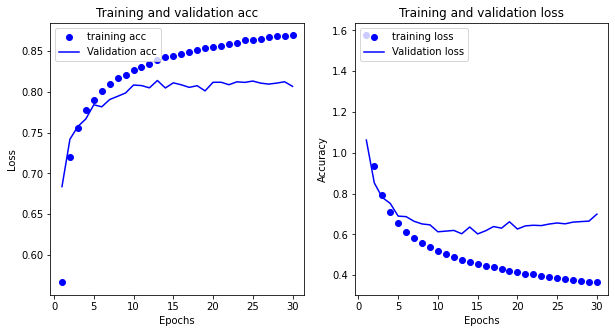

In [59]:
#Build
model = models.Sequential()
model.add(layers.Dense(64,activation="relu", input_shape=(784,)))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(47,activation="softmax"))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001, momentum=0.1),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Train the model
history12 = model.fit(partial_X_train, partial_Y_train , epochs=30,batch_size=128,validation_data=(X_val, Y_val))
#Plot the results
plot_history_results(history12.history)

Based on the output of model 12, it has shown the best validation accuracy of 0.813 and best loss of 0.601. The plotted figure above has shown us that having a third layer has shown the additional weights and biases proved further improvements within the accuracy and loss of the model. It was decided that having a third layer may be considered within the final model.

### 2.6.11 Model 13: Increasing momentum to 0.2

Epoch 1/30
569/569 [==============================] - 3s 5ms/step - loss: 1.5509 - accuracy: 0.5847 - val_loss: 1.1661 - val_accuracy: 0.6716
Epoch 2/30
569/569 [==============================] - 2s 4ms/step - loss: 1.0463 - accuracy: 0.7028 - val_loss: 1.0057 - val_accuracy: 0.7056
Epoch 3/30
569/569 [==============================] - 2s 4ms/step - loss: 0.9032 - accuracy: 0.7380 - val_loss: 0.8960 - val_accuracy: 0.7397
Epoch 4/30
569/569 [==============================] - 2s 4ms/step - loss: 0.8136 - accuracy: 0.7585 - val_loss: 0.8312 - val_accuracy: 0.7549
Epoch 5/30
569/569 [==============================] - 2s 4ms/step - loss: 0.7507 - accuracy: 0.7744 - val_loss: 0.7915 - val_accuracy: 0.7600
Epoch 6/30
569/569 [==============================] - 3s 5ms/step - loss: 0.7077 - accuracy: 0.7841 - val_loss: 0.7574 - val_accuracy: 0.7734
Epoch 7/30
569/569 [==============================] - 2s 4ms/step - loss: 0.6733 - accuracy: 0.7933 - val_loss: 0.7422 - val_accuracy: 0.7779
Epoch 

<Figure size 432x288 with 0 Axes>

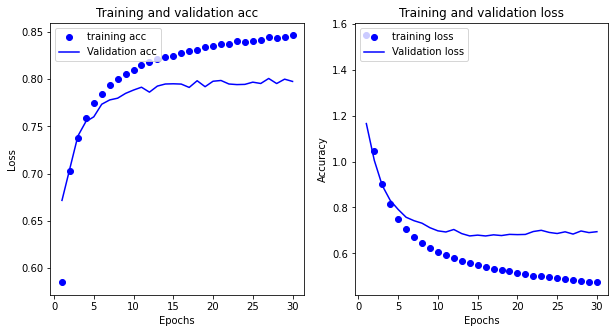

In [60]:
#Build
model = models.Sequential()
model.add(layers.Dense(64,activation="relu", input_shape=(784,)))
model.add(layers.Dense(47,activation="softmax"))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001, momentum=0.2),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Train the model
history13 = model.fit(partial_X_train, partial_Y_train , epochs=30,batch_size=128,validation_data=(X_val, Y_val))
#Plot the results
plot_history_results(history13.history)

The output results from model 13 showed the best accuracy of 0.80 and the best loss of 0.675. The visual plotted diagram above has shown us that increasing the momentum has achieved a slight improvement within the accuracy and loss of the model. Increasing the momentum essentially enables the model to escape from a local gradient minimum in hopes of landing at a better minimum. For these reasons, it was decided to consider having the momentum increased to 0.2 for the final model.

### 2.6.12 Model 14: increasing momentum to 0.7

Epoch 1/30
569/569 [==============================] - 2s 2ms/step - loss: 1.3065 - accuracy: 0.6345 - val_loss: 0.9819 - val_accuracy: 0.7078
Epoch 2/30
569/569 [==============================] - 1s 2ms/step - loss: 0.8616 - accuracy: 0.7444 - val_loss: 0.8092 - val_accuracy: 0.7556
Epoch 3/30
569/569 [==============================] - 1s 2ms/step - loss: 0.7345 - accuracy: 0.7747 - val_loss: 0.7613 - val_accuracy: 0.7685
Epoch 4/30
569/569 [==============================] - 1s 2ms/step - loss: 0.6757 - accuracy: 0.7893 - val_loss: 0.7263 - val_accuracy: 0.7777
Epoch 5/30
569/569 [==============================] - 1s 2ms/step - loss: 0.6412 - accuracy: 0.7970 - val_loss: 0.7029 - val_accuracy: 0.7834
Epoch 6/30
569/569 [==============================] - 1s 2ms/step - loss: 0.6157 - accuracy: 0.8040 - val_loss: 0.7227 - val_accuracy: 0.7824
Epoch 7/30
569/569 [==============================] - 1s 2ms/step - loss: 0.5983 - accuracy: 0.8088 - val_loss: 0.7162 - val_accuracy: 0.7864
Epoch 

<Figure size 432x288 with 0 Axes>

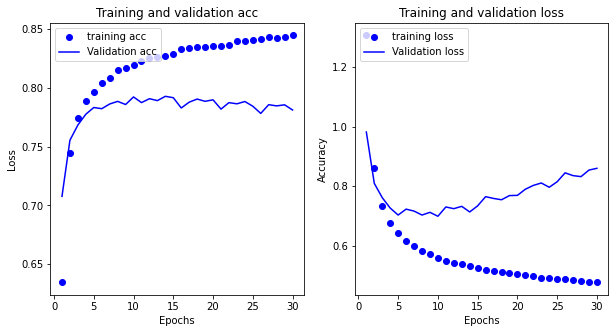

In [78]:
#Build
model = models.Sequential()
model.add(layers.Dense(64,activation="relu", input_shape=(784,)))
model.add(layers.Dense(47,activation="softmax"))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001, momentum=0.7),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Train the model
history14 = model.fit(partial_X_train, partial_Y_train , epochs=30,batch_size=128,validation_data=(X_val, Y_val))
#Plot the results
plot_history_results(history14.history)

The above results from model 14 have the best accuracy of 0.792 , and the best loss of 0.698. Further increasing the momentum to 0.7 has shown deteriorating results from accuracy and loss compared to model 13. Essentially, the increased momentum has overshot the previous lowest minimum. There also seems to be great signs of overfitting which occurs from around the 4th epoch. So it was decided not to consider increasing the momentum to 0.7 for the final model.

### 2.6.13 Final model : 3 layers, dropout(0.5), lr(0.0005), momentum(0.2), units(128,64,50)

After several iterations, it was concluded that the following models were considered to be a part of the final model:
- Model 12 : It has been noted that having 3 layers has shown positive improvements towards validation accuracy and validation loss.
- Model 11 : This model has shown a combination of L2 regularizer and dropout proven to have greater generalization. The plot has shown that overfitting has been reduced by a huge margin.
- Model 7 : Decreasing the learning rate to "0.0005" has been noted to have a much smoother and stable loss and accuracy, this was evident in the plotted figure.
- Model 13: There was evidence that increasing the momentum to 0.2 has helped achieve a greater minimum in terms of loss and in turn, achieved greater accuracy
 
The combination of all ideas from model 12, model 11, model 7 and model 13 has resulted in this final architecture:

Epoch 1/30
569/569 [==============================] - 3s 4ms/step - loss: 2.1798 - accuracy: 0.4900 - val_loss: 1.4551 - val_accuracy: 0.6604
Epoch 2/30
569/569 [==============================] - 2s 4ms/step - loss: 1.3535 - accuracy: 0.6853 - val_loss: 1.2005 - val_accuracy: 0.7236
Epoch 3/30
569/569 [==============================] - 2s 4ms/step - loss: 1.1557 - accuracy: 0.7336 - val_loss: 1.0783 - val_accuracy: 0.7528
Epoch 4/30
569/569 [==============================] - 2s 4ms/step - loss: 1.0516 - accuracy: 0.7595 - val_loss: 0.9904 - val_accuracy: 0.7767
Epoch 5/30
569/569 [==============================] - 2s 4ms/step - loss: 0.9815 - accuracy: 0.7764 - val_loss: 0.9411 - val_accuracy: 0.7878
Epoch 6/30
569/569 [==============================] - 2s 4ms/step - loss: 0.9353 - accuracy: 0.7851 - val_loss: 0.9231 - val_accuracy: 0.7897
Epoch 7/30
569/569 [==============================] - 2s 4ms/step - loss: 0.8968 - accuracy: 0.7953 - val_loss: 0.8899 - val_accuracy: 0.7957
Epoch 

<Figure size 432x288 with 0 Axes>

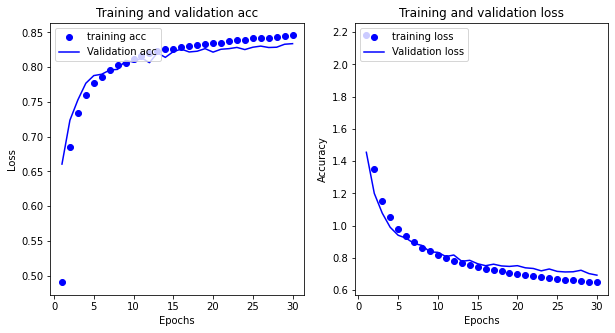

In [81]:
#Build
model = models.Sequential()
model.add(layers.Dense(128,kernel_regularizer=regularizers.l2(0.001),activation="relu", input_shape=(784,)))
model.add(layers.Dropout(0.01))
model.add(layers.Dense(64,kernel_regularizer=regularizers.l2(0.001),activation="relu"))
model.add(layers.Dropout(0.01))
model.add(layers.Dense(50,kernel_regularizer=regularizers.l2(0.001),activation="relu"))
model.add(layers.Dropout(0.01))
model.add(layers.Dense(47,activation="softmax"))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005, momentum=0.2),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
#Train the model
history17 = model.fit(partial_X_train, partial_Y_train , epochs=30,batch_size=128,validation_data=(X_val, Y_val))
#Plot the results
plot_history_results(history17.history)

The final model has been shown to have the best accuracy at 0.833 and the best loss at 0.693. The figure above has shown significant improvements as the signs of overfitting have been reduced a lot compared to Model 2. The composite of all the best regularization techniques has achieved a far greater generalization from the input data.

### Evaluating on unseen test set 
The final model has been trained and will now be tested on new unseen data for the first time. 

In [83]:
model.evaluate(X_test,Y_test)

588/588 [==============================] - 1s 998us/step - loss: 0.7136 - accuracy: 0.8307


[0.7136103510856628, 0.8306824564933777]

Predicted class: 27 vs Actuall class : 27


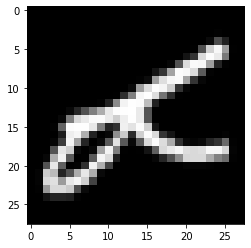

In [115]:
#Evaluating one of the prediction made by the final model
predictions = model.predict(X_test)
print("Predicted class: "+str(np.argmax(predictions[21]))+" vs Actual class : "+str(np.argmax(Y_test[21])))
display_img(X_test[21])

In [137]:
#Evaluating the first 20 predictions against the first 20 actual results
for i in range(20):
    result = "\033[92m" if  np.argmax(predictions[i]) == np.argmax(Y_test[i]) else "\33[31m"
    print(result+"Predicted class: "+str(np.argmax(predictions[i]))+" vs Actual class : "+str(np.argmax(Y_test[i])))

Predicted class: 4 vs Actual class : 1
Predicted class: 44 vs Actual class : 44
Predicted class: 29 vs Actual class : 29
Predicted class: 1 vs Actual class : 1
Predicted class: 8 vs Actual class : 8
Predicted class: 22 vs Actual class : 22
Predicted class: 4 vs Actual class : 4
Predicted class: 26 vs Actual class : 26
Predicted class: 36 vs Actual class : 36
Predicted class: 16 vs Actual class : 16
Predicted class: 37 vs Actual class : 6
Predicted class: 29 vs Actual class : 29
Predicted class: 10 vs Actual class : 10
Predicted class: 3 vs Actual class : 3
Predicted class: 11 vs Actual class : 11
Predicted class: 40 vs Actual class : 40
Predicted class: 26 vs Actual class : 26
Predicted class: 12 vs Actual class : 12
Predicted class: 43 vs Actual class : 43
Predicted class: 35 vs Actual class : 2


The final model has received very little diminishing returns as it has been shown to have gotten a promising result of 0.71 for the loss, and 0.83 for the accuracy, this is evident in the evaluation of the first 20 unseen data, only 3 has been proven incorrect.

## 3 Results

| Models                                | Layers | Units     | LR     | Mom | L1    | L2    | Dropout | Max acc | Max loss | Min acc | Min loss |
|---------------------------------------|--------|-----------|--------|-----|-------|-------|---------|---------|----------|---------|----------|
| Model 1 : Simple                      | 1      | 64        | 0.001  | 0.1 | n/a   | n/a   | n/a     | 0.799   | 1.185    | 0.664   | 0.678    |
| Model 2 : Overfit                     | 2      | 512/512   | 0.001  | 0.1 | n/a   | n/a   | n/a     | 0.842   | 1.288    | 0.782   | 0.495    |
| Model 3 : reducing hidden units       | 1      | 50        | 0.001  | 0.1 | n/a   | n/a   | n/a     | 0.79    | 1.281    | 0.642   | 0.706    |
| Model 4 : Adding extra layer          | 2      | 64/64     | 0.001  | 0.1 | n/a   | n/a   | n/a     | 0.813   | 1.088    | 0.683   | 0.622    |
| Model 5 : Tuning hyperparameter units | 2      | 128/64    | 0.001  | 0.1 | n/a   | n/a   | n/a     | 0.824   | 0.999    | 0.702   | 0.576    |
| Model 6 : Increasing learning rate    | 1      | 64        | 0.0025 | 0.1 | n/a   | n/a   | n/a     | 0.797   | 1.026    | 0.694   | 0.696    |
| Model 7 : Decreasing learning rate    | 1      | 64        | 0.0005 | 0.1 | n/a   | n/a   | n/a     | 0.785   | 1.428    | 0.605   | 0.711    |
| Model 8 : Adding dropout layer        | 1      | 64        | 0.001  | 0.1 | n/a   | n/a   | 0.5     | 0.75    | 1.358    | 0.637   | 0.818    |
| Model 9 : l1 reg                      | 1      | 64        | 0.001  | 0.1 | 0.001 | n/a   | n/a     | 0.749   | 2.010    | 0.607   | 1.139    |
| Model 10 : l2 reg                     | 1      | 64        | 0.001  | 0.1 | n/a   | 0.001 | n/a     | 0.80    | 1.377    | 0.648   | 0.746    |
| Model 11 : l2 + dropout layer         | 1      | 64        | 0.001  | 0.1 | n/a   | 0.001 | 0.01    | 0.807   | 1.350    | 0.654   | 0.706    |
| Model 12: adding an additional layer  | 3      | 64/64/64  | 0.001  | 0.1 | n/a   | n/a   | n/a     | 0.813   | 1.062    | 0.683   | 0.601    |
| Model 13: Increasing momentum to 0.2  | 1      | 64        | 0.001  | 0.2 | n/a   | n/a   | n/a     | 0.80    | 1.166    | 0.671   | 0.675    |
| Model 14: Increasing momentum to 0.7  | 1      | 64        | 0.001  | 0.7 | n/a   | n/a   | n/a     | 0.792   | 0.981    | 0.707   | 0.698    |
| Final model: 3 layers                 | 3      | 128/64/50 | 0.0005 | 0.2 | n/a   | 0.001 | 0.01    | 0.832   | 1.455    | 0.665   | 0.70     |


The table above illustrates the results from all the iterations gathered during the workflow.

<Figure size 432x288 with 0 Axes>

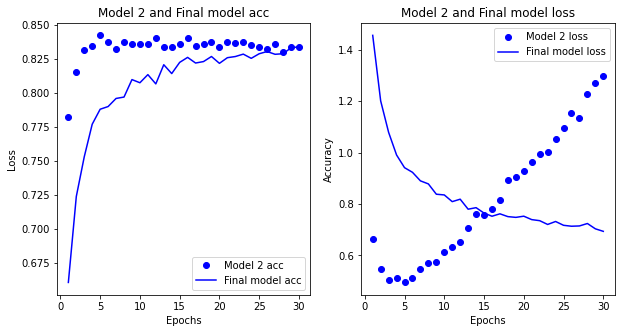

In [130]:
compare_models(history2.history,history17.history,"Model 2","Final model")

Since the final model has been trained for 30 epochs, the results of the final model have shown major distinguishable improvements compared to the overfitted Model (model 2). The visual diagram shows the comparison between the final model and the overfitted model. The diagram clearly shows that the effects of overfitting have been massively reduced to the point generalisation has prevailed. Although the loss and accuracy may seem to be progressively slower, it does seem to look more stable, and there seem to be no signs of deterioration compared to the overfitted model.

Furthermore, the results of the final model have reinforced the hypothesis I have made earlier, that the data will learn the relationship between input and output data. The final model has also proven that it is possible to achieve greater statistical power for the task as compared to the first simple model. 

### 3.1 Future investigation:

I believe the results may have been greater if Convolutional Neural Networks (CNN) were used as CNN are more specialised towards visual imagery data. Overall, I am very pleased with how the results turned out from using Dense layers. Perhaps in the future, it would be desired to investigate the use of CNN for this specific task.


## 4 Conclusions

The purpose of this research was to identify whether HWR can be achieved using DNN. After several iterations of experiments, it was concluded with the final model that achieved an accuracy of 83% on new unseen data. This is significant as it strengthened the hypotheses made earlier, and also validated the decisions made throughout this investigation.

The EMNIST dataset proved to be very effective as its inputs were able to generate reliable results during the training process, It proved to be very useful for the multiclass classification problem. The universal Deep Learning workflow proved to be a very effective methodology for preparing data and developing models with excellent generalisation performance on unseen data.

A couple of regularisation techniques were explored that helped reduce the effects of a common issue, overfitting. Tuning the hyperparameters was able to make huge differences which helped improve the model's performance. For instance, adding dropout layer, l2 regularizers, decreasing learning rate, tweaking units, adding layers and increasing momentum proved to mitigate overfitting and improve generalisation.

## 4 References

1. Crawford, C., 2017. EMNIST (Extended MNIST). [online] Kaggle.com. Available at: <https://www.kaggle.com/crawford/emnist> [Accessed 20 November 2021].
2. Francois Chollet. 2017. Deep Learning with Python (1st. ed.). Manning Publications Co., USA.